In [1]:
from __future__ import print_function
import sys
sys.path.append('../')
import numpy as np

In [2]:
from scipy import stats
from skimage import io
import numpy as np
import requests
import math
from pprint import pprint
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
import clusters.processors as proc
import clusters.meanshift as ms
import clusters.request_parser as rp
import clusters.convex_hull as ch
import utils.nb as nb
reload(ch)
reload(proc)
reload(ms)
reload(rp)
reload(nb)
from clusters.meanshift import MShift
from clusters.request_parser import RequestParser
from clusters.convex_hull import ConvexHull

---
### GET DATA (not via dynamodb)

In [4]:
import local_env as lenv
lenv.export('dev')
def meanshift(im_data,req):
    return MShift(
        data=im_data,
        width=req.width,
        min_count=req.min_count,
        iterations=req.iterations)


EXPORTING dev ENV:
	width: 5
	iterations: 25
	table: GFW_GLAD_CLUSTER.DEV.1
	url: http://wri-tiles.s3.amazonaws.com/glad_prod/tiles
	min_count: 25
	bucket: wri-tiles
	zoom: 12




---
# 2016-06-01 to 2017-06-01

In [5]:
data={ "z":12,"x":1358,"y":2047,"start_date":"2016-06-01","end_date":"2017-06-01" }
req=RequestParser(data)
data=io.imread(req.data_path)
im_data=proc.glad_between_dates(data,start_date=req.start_date,end_date=req.end_date)
c=meanshift(im_data,req)
%time cdata=c.clusters_data()
clusters=cdata['clusters']

CPU times: user 2.91 s, sys: 10.7 ms, total: 2.92 s
Wall time: 2.94 s


In [6]:
print("CLUSTERS_DATA PROPERTIES:",cdata.keys())
print("CLUSTER PROPERTIES:",clusters[0].keys())

CLUSTERS_DATA PROPERTIES: ['input_data', 'nb_clusters', 'clusters']
CLUSTER PROPERTIES: ['count', 'alerts', 'area', 'i', 'j', 'min_date', 'max_date']


NB CLUSTERS: 7


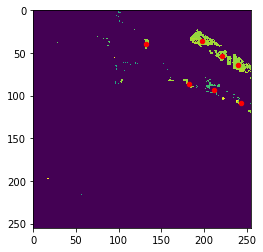

In [7]:
nb.plot_clusters(cdata)

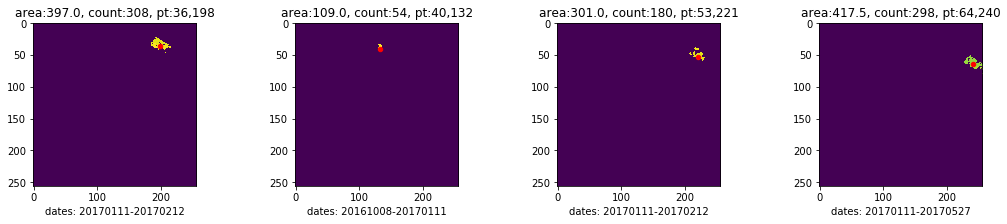

In [8]:
nb.plot_clusters_row(clusters[:4])

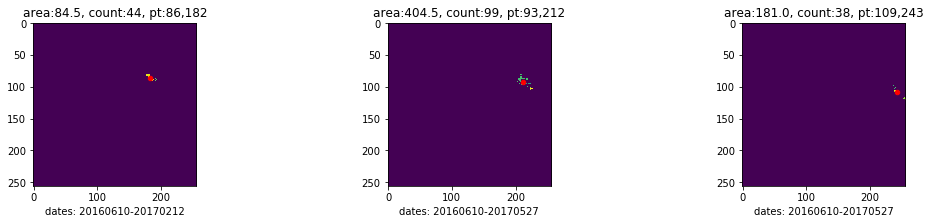

In [9]:
nb.plot_clusters_row(clusters[4:])

{'area': 301.0,
 'count': 180,
 'i': 53,
 'j': 221,
 'max_date': 20170212,
 'min_date': 20170111}


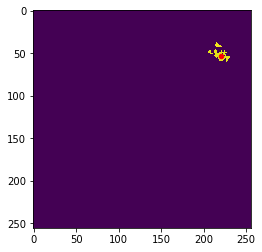

In [10]:
nb.plot_cluster(clusters[2])

---
# 2015 run

In [11]:
data={ "z":12,"x":1358,"y":2047,"start_date":"2015-01-01","end_date":"2016-02-01" }
req=RequestParser(data)
data=io.imread(req.data_path)
im_data=proc.glad_between_dates(data,start_date=req.start_date,end_date=req.end_date)
c=meanshift(im_data,req)
%time cdata=c.clusters_data()
clusters=cdata['clusters']

CPU times: user 786 ms, sys: 2.61 ms, total: 788 ms
Wall time: 793 ms


NB CLUSTERS: 7


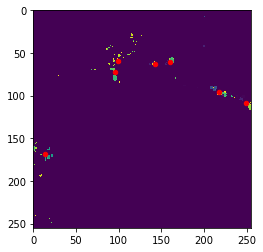

In [12]:
nb.plot_clusters(cdata)

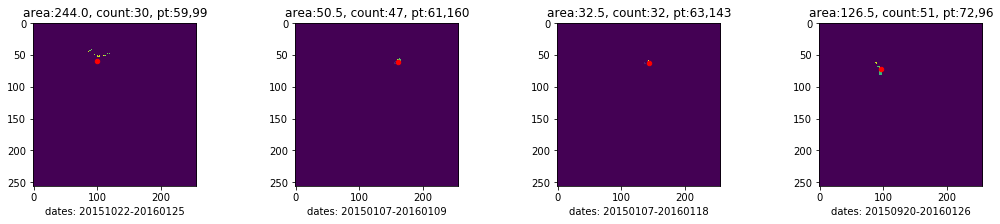

In [13]:
nb.plot_clusters_row(clusters[:4])

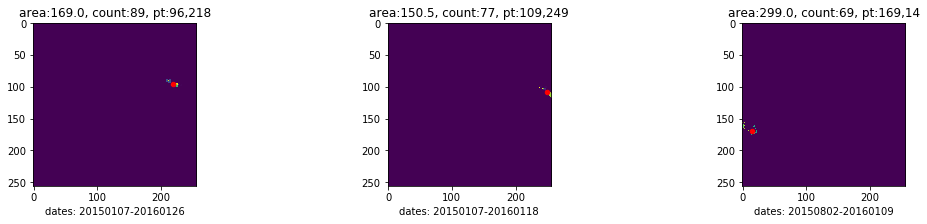

In [14]:
nb.plot_clusters_row(clusters[4:])